# Recommendation System 

### User Based Collaberative Filtering
Cosine Similarity
$$
similarity(u,v) = \cos(\theta) = \frac{\sum_{i \in I} r_{ui} \cdot r_{vi}} {\sqrt{\sum_{i \in I} r_{ui}^2} \cdot \sqrt{\sum_{i \in I} r_{vi}^2 }}
$$

In [112]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [113]:
anime = pd.read_csv('anime.csv')
anime.head(2)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


In [114]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [115]:
anime.shape

(12294, 7)

In [116]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [117]:
anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [118]:
# Handle Missing Values

anime['genre'] = anime['genre'].fillna('Unknown')
anime['type'] = anime['type'].fillna('Unknown')
anime['rating'] = anime['rating'].fillna(anime['rating'].mean())

In [119]:
# Convert Episode to Numeric

anime['episodes'] = anime['episodes'].replace('Unknown','0').astype('int')

# anime['episodes'] = pd.to_numeric(anime['episodes'], errors = 'coerce').fillna(0)

In [120]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  int32  
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 624.4+ KB


In [121]:
anime['rating'].isnull().sum()

0

In [122]:
type_counts = anime['type'].value_counts()
genre_counts = anime['genre'].str.split(',').explode().value_counts().head(10)

<Axes: xlabel='type'>

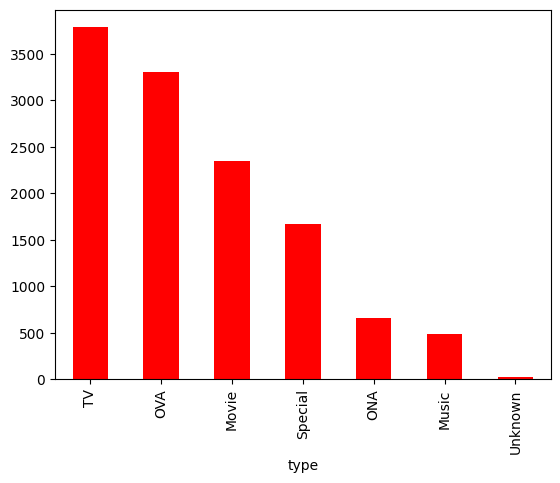

In [123]:
type_counts.plot(kind = 'bar', color = 'red')

<Axes: xlabel='genre'>

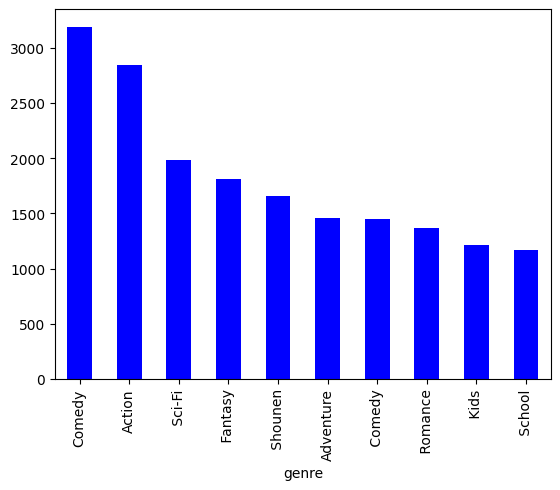

In [124]:
genre_counts.plot(kind = 'bar' , color = 'blue')

In [125]:
rating = pd.read_csv('rating.csv')
rating.head(2)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1


In [126]:
rating.shape

(7813737, 3)

In [127]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [128]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [129]:
rating = rating[rating['rating'] != -1]
rating.shape

(6337241, 3)

In [130]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [131]:
rating['rating'].unique()

array([10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

In [132]:
rating['rating'] = rating['rating'].fillna(anime['rating'].mean())

In [133]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [134]:
len(rating['anime_id'].unique())

9927

In [135]:
len(rating['user_id'].unique())

69600

In [136]:
rating['anime_id'] = rating['anime_id'].fillna(rating['anime_id'].mean())

In [137]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [138]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6337241 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


In [139]:
import statistics

In [140]:
rating_per_user = rating.groupby('user_id')['rating'].count()
mean_rating_per_user = np.mean(rating_per_user.tolist())
mean_rating_per_user

91.05231321839081

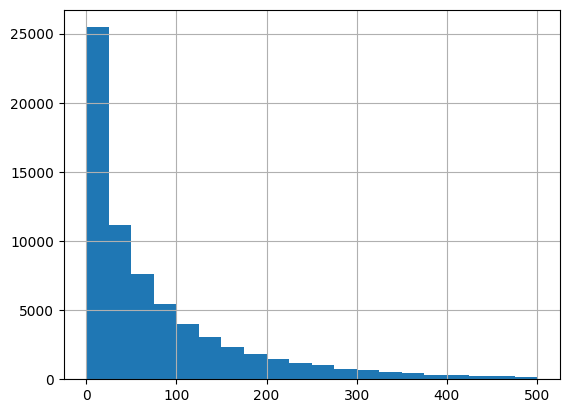

In [141]:
rating_per_user.hist(bins =20, range = (0,500))
plt.show()

In [142]:
rating_per_anime = rating.groupby('anime_id')['rating'].count()
mean_rating_per_anime = np.mean(rating_per_anime.tolist())
mean_rating_per_anime

638.3843054296364

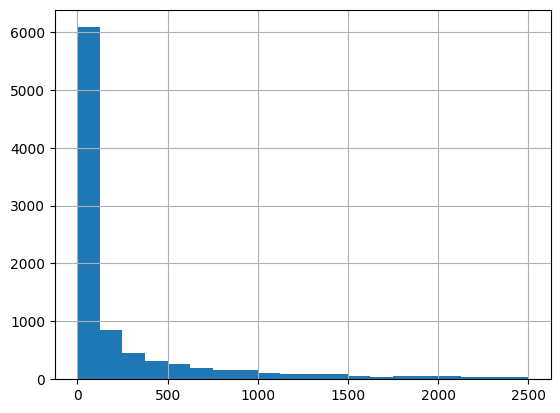

In [143]:
rating_per_anime.hist(bins = 20, range = (0,2500))
plt.show()

In [144]:
rating_per_anime_df = pd.DataFrame(rating_per_anime)
rating_per_anime_df

,rating
anime_id,
1,13449
5,5790
6,9385
7,2169
8,308
...,...
34324,11
34325,15
34349,3


In [145]:
filtered_rating_per_anime_df = rating_per_anime_df[rating_per_anime_df.rating >=100]
filtered_rating_per_anime_df

,rating
anime_id,
1,13449
5,5790
6,9385
7,2169
8,308
...,...
33558,663
33569,137
33964,172


In [146]:
popular_anime = filtered_rating_per_anime_df.index.tolist()
popular_anime

[1,
 5,
 6,
 7,
 8,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 2

In [147]:
rating_per_user_df = pd.DataFrame(rating_per_user)
rating_per_user_df

,rating
user_id,
1,4
2,1
3,92
5,459
7,343
...,...
73512,12
73513,33
73514,1


In [148]:
filtered_rating_per_user_df = rating_per_user_df[rating_per_user_df.rating >= 500]
filtered_rating_per_user_df.head(2)

,rating
user_id,
226,742
271,599


In [149]:
prolific_users = filtered_rating_per_user_df.index.tolist()
prolific_users

[226,
 271,
 294,
 392,
 446,
 478,
 661,
 741,
 771,
 786,
 958,
 1019,
 1103,
 1145,
 1176,
 1191,
 1287,
 1344,
 1456,
 1497,
 1504,
 1522,
 1530,
 1720,
 1822,
 1984,
 2200,
 2273,
 2297,
 2378,
 2632,
 2695,
 2701,
 2810,
 2820,
 2951,
 3040,
 3117,
 3124,
 3127,
 3193,
 3203,
 3476,
 3500,
 3557,
 3569,
 3597,
 3657,
 4064,
 4102,
 4177,
 4215,
 4350,
 4468,
 4512,
 4749,
 4759,
 4834,
 4843,
 4883,
 4979,
 5056,
 5073,
 5137,
 5148,
 5264,
 5296,
 5310,
 5311,
 5325,
 5335,
 5357,
 5374,
 5394,
 5421,
 5428,
 5492,
 5504,
 5516,
 5555,
 5562,
 5584,
 5655,
 5669,
 5672,
 5720,
 5770,
 5815,
 5831,
 5895,
 5899,
 5908,
 5954,
 6111,
 6118,
 6152,
 6162,
 6265,
 6321,
 6361,
 6381,
 6384,
 6417,
 6434,
 6469,
 6474,
 6569,
 6583,
 6589,
 6618,
 6695,
 6769,
 6770,
 6771,
 6814,
 6836,
 6869,
 6925,
 6932,
 6969,
 6971,
 7080,
 7081,
 7114,
 7172,
 7247,
 7249,
 7297,
 7311,
 7340,
 7345,
 7350,
 7366,
 7421,
 7446,
 7511,
 7520,
 7600,
 7622,
 7659,
 7670,
 7672,
 7674,
 7711,
 77

In [150]:
filtered_rating = rating[rating.anime_id.isin(popular_anime)]
filtered_rating = filtered_rating[filtered_rating.user_id.isin(prolific_users)]

In [151]:
filtered_rating

,user_id,anime_id,rating
17304,226,1,8
17305,226,6,8
17306,226,20,7
17307,226,25,6
17308,226,27,7
...,...,...,...
7812698,73502,18893,9
7812699,73502,19151,5
7812700,73502,19221,6
7812701,73502,19367,6


In [152]:
# rating_matrix = filtered_rating.pivot_table(index = 'user_id', columns = 'anime_id', values = 'rating')
# rating_matrix = rating_matrix.fillna(0)
# rating_matrix.head()

In [153]:
import operator

In [162]:
def similar_user(user_id, matrix, k=3):

    user = matrix[matrix.index == user_id]
    other_users = matrix[matrix.index != user_id]
    similarity = cosine_similarity(user, other_users)[0].tolist()
    indices = other_users.index.tolist()
    index_similarity = dict(zip(indices, similarity))
    index_similaritys_sorted = sorted(index_similarity.items(), key = operator.itemgetter(1))
    index_similaritys_sorted.reverse()
    top_users_similarity = index_similaritys_sorted[:k]
    topusers = [u[0] for u in top_users_similarity]
    return topusers

In [163]:
cosine_similarity(rating_matrix[rating_matrix.index == 226], rating_matrix[rating_matrix.index != 226])[0].tolist()

[0.31983931965375384,
 0.3738449265435177,
 0.37625939184429313,
 0.4842505546869486,
 0.3555887792110661,
 0.3460919064119052,
 0.45552166390269494,
 0.400469848045065,
 0.3860971265023876,
 0.29764827956511913,
 0.4286049666360906,
 0.4043175264715487,
 0.3767619704521354,
 0.4025326258756206,
 0.35344437474861523,
 0.5083639438437187,
 0.44965424258538184,
 0.39470434198492754,
 0.41339971406151294,
 0.41832929759930876,
 0.4473111211983493,
 0.46051435851993555,
 0.2717130559573414,
 0.2866739486764374,
 0.3037593851031888,
 0.26729897121128793,
 0.21709629591941965,
 0.5373413983772695,
 0.40266364913464886,
 0.3975488540752768,
 0.2609903292042717,
 0.4025704081931255,
 0.4742296800316964,
 0.3524652755037373,
 0.3979133573894418,
 0.4851040242525281,
 0.4483002122291083,
 0.4666803497062719,
 0.5021256803727586,
 0.5310988765603728,
 0.5535142515658551,
 0.4244475474871866,
 0.29361198611467676,
 0.33418896619945765,
 0.29169867008104033,
 0.41340952891142785,
 0.407821916105491

In [164]:
current_user = 446
similar_user_indices = similar_user(current_user, rating_matrix)
print(similar_user_indices)

[49776, 38196, 41714]


In [165]:
# Item Recommendations

def recommend_item(user_index, similar_user_indices, matrix, items = 5):
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    similar_users = similar_users.mean(axis = 0)
    similar_user_df = pd.DataFrame(similar_users, columns = ['mean'])
    user_df = matrix[matrix.index == user_index]
    user_df_transposed = user_df.transpose()
    user_df_transposed.columns = ['rating']
    user_df_transposed = user_df_transposed[user_df_transposed.rating == 0]
    anime_unseen = user_df_transposed.index.tolist()
    similar_user_df_filtered = similar_user_df[similar_user_df.index.isin(anime_unseen)]
    similar_user_df_ordered = similar_user_df_filtered.sort_values(by = ['mean'], ascending = False)
    top_n_anime = similar_user_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()
    anime_information = anime['anime_id'].isin(top_n_anime_indices) 
    return anime_information

In [161]:
recommend_item(446, similar_user_indices, rating_matrix, items = 5)

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: anime_id, Length: 12294, dtype: bool

In [166]:
rating_matrix.transpose()

user_id,226,271,294,392,446,478,661,741,771,786,...,73234,73272,73286,73340,73356,73362,73378,73395,73499,73502
anime_id,,,,,,,,,,,,,,,,,,,,,
1,8.0,0.0,7.0,7.0,9.0,0.0,0.0,10.0,8.0,0.0,...,0.0,9.0,10.0,9.0,7.0,10.0,9.0,10.0,9.0,0.0
5,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,7.0,0.0,...,0.0,9.0,10.0,0.0,0.0,10.0,9.0,9.0,0.0,0.0
6,8.0,0.0,0.0,7.0,9.0,0.0,0.0,0.0,8.0,0.0,...,0.0,10.0,9.0,0.0,9.0,0.0,0.0,10.0,9.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,9.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,7.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
33569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
def similar_user(anime_id, matrix, k=3):
    matrix = matrix.transpose()
    anime = matrix[matrix.index == anime_id]
    other_anime = matrix[matrix.index != anime_id]
    similarity = cosine_similarity(anime, other_anime)[0].tolist()
    indices = other_anime.index.tolist()
    index_similarity = dict(zip(indices, similarity))
    index_similaritys_sorted = sorted(index_similarity.items(), key = operator.itemgetter(1))
    index_similaritys_sorted.reverse()
    top_anime_similarity = index_similaritys_sorted[:k]
    topanime = [u[0] for u in top_anime_similarity]
    return topanime

In [175]:
similar_user(15, rating_matrix, k=3)

[263, 5040, 22]